# 网页浏览行为关联规则挖掘

In [1]:
from src.data_preprocess import *
from tqdm import tqdm
import pandas as pd

## 1. 数据预处理: 清洗数据，处理缺失值，提取用户浏览记录。
    将用户的id作为key，User对象作为值构建字典，User对象贮存每个用户的访问记录

In [2]:
website_map, user_map = load_data()
i=0
for key,value in user_map.items():
    i+=1
    print(f"user_id:{value.id},visits:{value.visits}")
    if i==5:
        break

user_id:10001,visits:['1000', '1001', '1002']
user_id:10002,visits:['1001', '1003']
user_id:10003,visits:['1001', '1003', '1004']
user_id:10004,visits:['1005']
user_id:10005,visits:['1006']


## 2. 数据探索性分析: 分析最常被访问的页面、页面访问量分布等。
    website_map储存每个页面id，地址，访问用户，访问次数等信息，
    如下打印了访问量最高的10个页面，绘制了访问频率的分布直方图，其中横坐标表示访问量的范围，纵坐标为对应访问量区间内的频数

最常被访问的10个页面:
visit times = 10836	url=www.microsoft.com/msdownload
visit times = 9383	url=www.microsoft.com/ie
visit times = 8463	url=www.microsoft.com/search
visit times = 5330	url=www.microsoft.com/isapi
visit times = 5108	url=www.microsoft.com/products
visit times = 4628	url=www.microsoft.com/windows
visit times = 4451	url=www.microsoft.com/support
visit times = 3220	url=www.microsoft.com/sitebuilder
visit times = 2968	url=www.microsoft.com/kb
visit times = 2123	url=www.microsoft.com/gallery


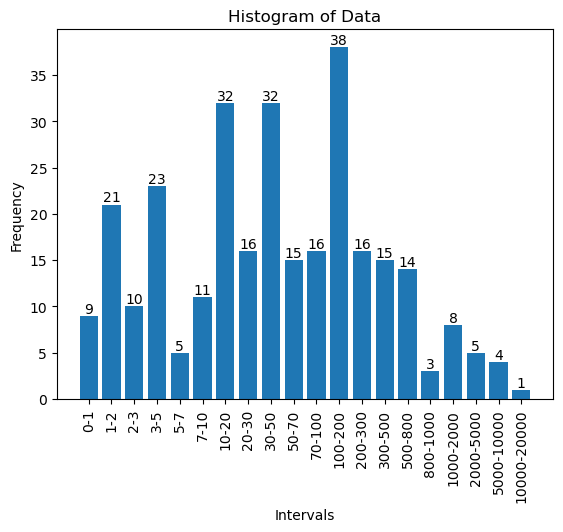

In [3]:
website_map, user_map = prepare_fp_data(website_map, user_map)

## 3. 关联规则挖掘: 使用Apriori算法或FP-growth算法，根据用户浏览记录计算频繁项集和关联规则。
    使用FP-growth算法，进行了用户浏览记录计算频繁项集和关联规则的挖掘。
    输出了1~5项集的前五个最频繁的项集，其中一行的第一个列表表示，项集中web的ids，第二项表示出现的频率，例如[['1008', '1034', '1017'], 1038]代表id为'1008', '1034', '1017'的三个网页被1038个用户同时访问过。

In [4]:
fp_tree = FPTree(website_map)
for v in tqdm(user_map.values(),total=len(user_map)):
    fp_tree.add(v.visits)
results = fp_tree.mining(1)
results = post_process(results)
for key in results.keys():
    print(key)
    for i in range(5):
        print(f"\t{results[key][i]}")

100%|██████████████████████████████████████████████████████████████████████████| 32689/32689 [00:06<00:00, 5115.41it/s]


1
	[['1008'], 10836]
	[['1004'], 5567]
	[['1034'], 4123]
	[['1018'], 1766]
	[['1017'], 1490]
2
	[['1008', '1034'], 5260]
	[['1008', '1009'], 2549]
	[['1008', '1018'], 2390]
	[['1008', '1017'], 2003]
	[['1008', '1004'], 1977]
3
	[['1008', '1034', '1017'], 1038]
	[['1008', '1018', '1009'], 990]
	[['1008', '1034', '1018'], 951]
	[['1008', '1034', '1004'], 824]
	[['1008', '1034', '1009'], 783]
4
	[['1008', '1018', '1009', '1035'], 547]
	[['1008', '1034', '1018', '1009'], 342]
	[['1008', '1018', '1001', '1003'], 335]
	[['1008', '1018', '1009', '1001'], 303]
	[['1008', '1034', '1004', '1017'], 295]
5
	[['1008', '1018', '1009', '1001', '1035'], 154]
	[['1008', '1004', '1018', '1001', '1003'], 153]
	[['1008', '1018', '1009', '1001', '1003'], 145]
	[['1008', '1004', '1018', '1009', '1001'], 143]
	[['1008', '1004', '1018', '1017', '1001'], 139]


## 4. 结果评估: 计算关联规则的支持度、置信度和提升度，得出强关联规则。
    对支持度、置信度分别输出了最高的10个结果，并输出了提升度最高的10个结果以及相应的卡方值和p值

In [5]:
support, confidence, lift_x2 = support_confidence_lift(len(user_map), website_map, results['2'])
print("support:")
for i in range(10):
    print(f"\t{support[i]}")
print("confidence")
for i in range(10):
    print(f"\t{confidence[i]}")
print("lift and X2")
head = ["url1","url2","lift","X2","P"]
l = lift_x2[:10]
l=pd.DataFrame([head]+l)
print(l)

support:
	['/msdownload', '/ie', 0.16091039799320872]
	['/msdownload', '/windows', 0.07797730123283061]
	['/msdownload', '/isapi', 0.073113279696534]
	['/msdownload', '/products', 0.061274434825170546]
	['/msdownload', '/search', 0.06047906023432959]
	['/msdownload', '/support', 0.03597540457034477]
	['/search', '/support', 0.02921472054819664]
	['/ie', '/search', 0.028113432653186086]
	['/search', '/products', 0.024901342959405305]
	['/isapi', '/support', 0.02386123772522867]
confidence
	['/msdownload', '/ie', 0.48541897379106685, 0.5605882979857189]
	['/msdownload', '/windows', 0.23523440383905503, 0.5507778738115817]
	['/msdownload', '/isapi', 0.22056109265411591, 0.4484052532833021]
	['/sitebuilder', '/gallery', 0.2003105590062112, 0.30381535562882717]
	['/msdownload', '/products', 0.18484680693983022, 0.39212999216914646]
	['/msdownload', '/search', 0.18244739756367664, 0.2336051045728465]
	['/isapi', '/support', 0.14634146341463417, 0.17524151875982927]
	['/search', '/support', 0

## 5. 结果分析与应用: 分析得到的关联规则，为网站提供导航结构优化建议，以提升用户体验。
根据给出的网页访问关联提升度数据，我们可以分析得到以下关联规则和导航结构优化建议：

从支持度的结果：

    当用户访问'/msdownload'时，可以在页面添加'/ie'，'/windows'，'/isapi'，'/products'，'/search'，'/support'的导航链接，因为这几个链接对'/msdownload'的支持度较高，说明当用户访问'/msdownload'时，也会经常访问这几个页面

从提升度与卡方的结果：

卡方值与p值的分析可以得出，在提升度前十的p值均小于0.01，因此可以认为两个url的访问是相关的

    当用户访问'/jobs'页面时，与之关联度最高的页面是'/college'，提升度为19.74。建议在'/jobs'页面中添加指向'/college'页面的导航链接，或者反之，以便用户能够方便地访问相关内容。
    当用户访问'/regwiz'页面时，与之关联度最高的页面是'/macoffice'，提升度为6.09。建议在'/regwiz'页面中添加指向'/macoffice'页面的导航链接，以提供更好的导航体验。
    当用户访问'/regwiz'页面时，与之关联度较高的页面是'/officefreestuff'，提升度为3.54。可以考虑在'/regwiz'页面中添加指向'/officefreestuff'页面的导航链接，以便用户探索相关免费资源。
    
